Text(0.5, 1.0, 'initial configuration')

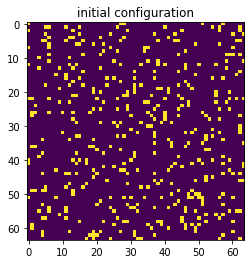

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import numba
from numba import njit
from scipy.ndimage import convolve, generate_binary_structure

N =64
init_random = np.random.random((N,N))
lattice_n = np.zeros((N, N))
lattice_n[init_random>=0.9] = 1
lattice_n[init_random<0.9] = -1

plt.imshow(lattice_n)
plt.title('initial configuration')

Metropolis algorithm for the two-dimensional Ising model

1.choose a random 64*64 spin configuration {S}^1

2.flip random one site's spin, and get a new configuration {s}_bar

3.calculate the alpha = w({S}^1)/w({S}_bar) = exp(-beta* delta(E)), where delta(E) is the energy diffence of two configuration

4.choose a random number gamma between [0,1], and compare gamma with alpha, if appha > gamma, {S}^2 = {S}_bar, otherwise {S}^2 = {S}^1

5.iterate the following procedure for 10000 times

6.calculate average magnetic field <m>, m = sum of (si)/L/N/N

In [37]:
def metropolis(spin_arr, times, T , h):
    BJ=1/T
    N = len(spin_arr)
    spin_arr = spin_arr.copy()
    net_spins = np.zeros(times-1)
    for t in range(0,times-1):
        # 2. pick random point on array and flip spin
        x = np.random.randint(0,N)
        y = np.random.randint(0,N)
        spin_i = spin_arr[x,y] #initial spin
        spin_f = spin_i*-1 #proposed spin flip
        
        # compute change in energy
        E_i = 0
        E_f = 0
        E_i += -spin_i*spin_arr[(x-1+N)%N,y]
        E_f += -spin_f*spin_arr[(x-1+N)%N,y]
        E_i += -spin_i*spin_arr[(x+1+N)%N,y]
        E_f += -spin_f*spin_arr[(x+1+N)%N,y]
        E_i += -spin_i*spin_arr[x,(y-1+N)%N]
        E_f += -spin_f*spin_arr[x,(y-1+N)%N]
        E_i += -spin_i*spin_arr[x,(y+1+N)%N]
        E_f += -spin_f*spin_arr[x,(y+1+N)%N]
        E_i += -spin_i*h
        E_f += -spin_f*h
        
        # 3 / 4. change state with designated probabilities
        dE = E_f-E_i
        if dE<=0:
            spin_arr[x,y]=spin_f
        elif (dE>0)*(np.random.random() < np.exp(-BJ*dE)):
            spin_arr[x,y]=spin_f
            
        net_spins[t] = spin_arr.sum()
            
    return net_spins, spin_arr

-0.9888462255859375

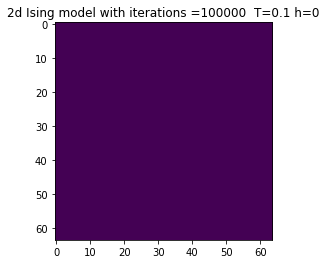

In [38]:
times = 100000
h=0
T = [0.1,0.5,2.0,10.0]

spins0 , spin_arr0 = metropolis(lattice_n, times, T[0],h)
plt.imshow(spin_arr0)
plt.title('2d Ising model with iterations ='+str(times)+'  T='+str(T[0])+' h='+str(h))
spins0.sum()/times/N/N

Text(0.5, 1.0, '2d Ising model with iterations =100000  T=0.5 h=0')

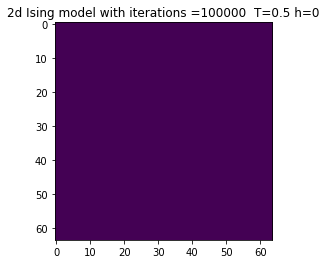

In [40]:
spins1 , spin_arr1 = metropolis(lattice_n, times, T[1],0)
plt.imshow(spin_arr1)
plt.title('2d Ising model with iterations ='+str(times)+'  T='+str(T[1])+' h='+str(h))

Text(0.5, 1.0, '2d Ising model with iterations =100000  T=2.0 h=0')

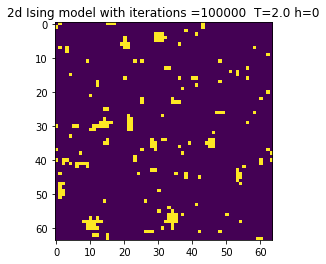

In [41]:
spins2 , spin_arr2 = metropolis(lattice_n, times, T[2],0)
plt.imshow(spin_arr2)
plt.title('2d Ising model with iterations ='+str(times)+'  T='+str(T[2])+' h='+str(h))

-0.0375158251953125

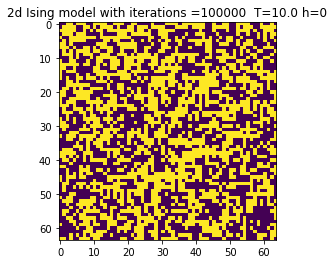

In [42]:
spins3 , spin_arr3 = metropolis(lattice_n, times, T[3],0)
plt.imshow(spin_arr3)
plt.title('2d Ising model with iterations ='+str(times)+'  T='+str(T[3])+' h='+str(h))
spins3.sum()/times/N/N

Text(0.5, 1.0, 'h=0')

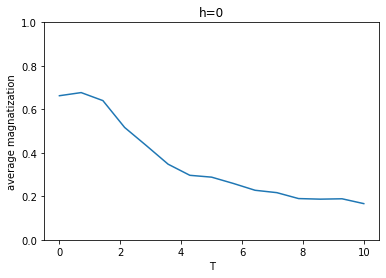

In [26]:
steps = 15
T_list = np.linspace(0.0000000000000001,10,steps)
h=0 
average_mag = np.zeros(steps)
i=0
for T in T_list:
    spins_h, arrays_h =metropolis(lattice_n, times, T,h)
    average_mag[i] = spins_h.sum()/times/N/N
    i+=1
plt.ylim([0,1])
plt.plot(T_list,average_mag)
plt.xlabel('T')
plt.ylabel('average magnatization')
plt.title('h='+str(h))


(0.0, 1.0)

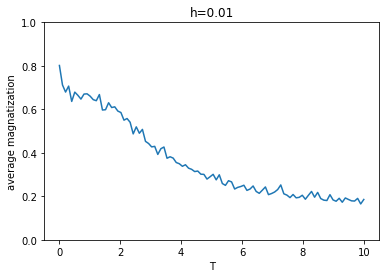

In [8]:
steps = 100
T_list = np.linspace(0.0001,10,steps)
h=0.01 
average_mag = np.zeros(steps)
i=0
for T in T_list:
    spins_h, arrays_h =metropolis(lattice_n, times, T,h)
    average_mag[i] = spins_h.sum()/times/N/N
    i+=1
plt.plot(T_list,average_mag)
plt.xlabel('T')
plt.ylabel('average magnatization')
plt.title('h='+str(h))
plt.ylim([0,1])

(0.0, 1.0)

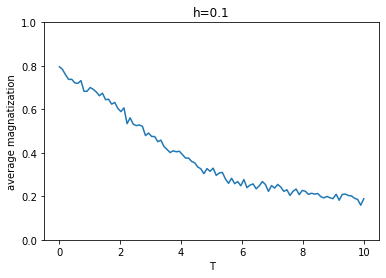

In [9]:
steps = 100
T_list = np.linspace(0.0001,10,steps)
h=0.1 
average_mag = np.zeros(steps)
i=0
for T in T_list:
    spins_h, arrays_h =metropolis(lattice_n, times, T,h)
    average_mag[i] = spins_h.sum()/times/N/N
    i+=1
plt.plot(T_list,average_mag)
plt.xlabel('T')
plt.ylabel('average magnatization')
plt.title('h='+str(h))
plt.ylim([0,1])

(0.0, 1.0)

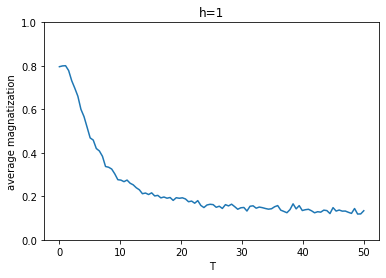

In [10]:
steps = 100
T_list = np.linspace(0.0001,50,steps)
h=1
average_mag = np.zeros(steps)
i=0
for T in T_list:
    spins_h, arrays_h =metropolis(lattice_n, times, T,h)
    average_mag[i] = spins_h.sum()/times/N/N
    i+=1
plt.plot(T_list,average_mag)
plt.xlabel('T')
plt.ylabel('average magnatization')
plt.title('h='+str(h))
plt.ylim([0,1])

(0.0, 1.0)

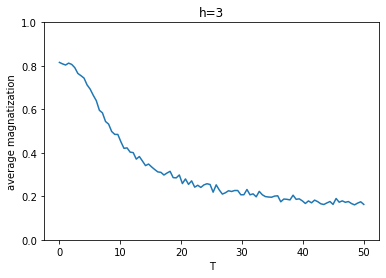

In [11]:
steps = 100
T_list = np.linspace(0.0001,50,steps)
h=3
average_mag = np.zeros(steps)
i=0
for T in T_list:
    spins_h, arrays_h =metropolis(lattice_n, times, T,h)
    average_mag[i] = spins_h.sum()/times/N/N
    i+=1
plt.plot(T_list,average_mag)
plt.xlabel('T')
plt.ylabel('average magnatization')
plt.title('h='+str(h))
plt.ylim([0,1])